In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
import seaborn as sns

In [49]:
data_original=pd.read_csv("train.csv")
data=data_original.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [51]:
data.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [52]:
data.drop(["Cabin","Name","Ticket","PassengerId"],axis=1,inplace=True)
data.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


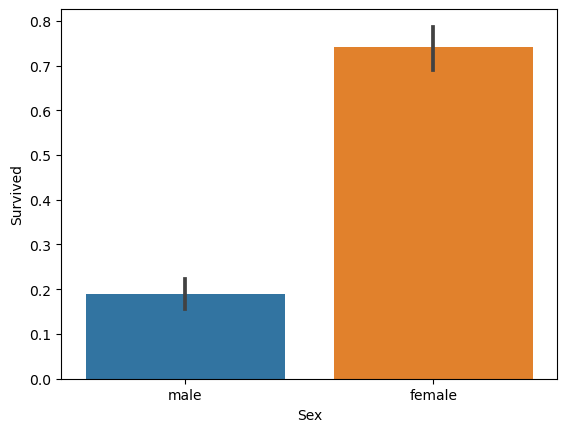

In [53]:
print(data.groupby("Sex")["Survived"].agg("mean"))
sns.barplot(x=data["Sex"],y=data["Survived"])
data["Age"]=data["Age"].fillna(np.mean(data["Age"]))


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


<Axes: xlabel='Embarked', ylabel='Survived'>

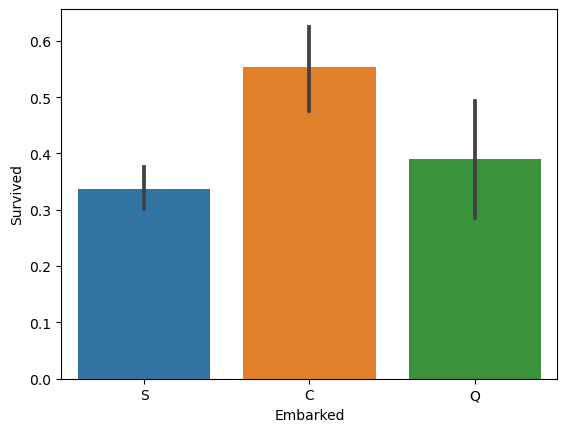

In [54]:
print(data.groupby("Embarked")["Survived"].agg("mean"))
sns.barplot(x=data["Embarked"],y=data["Survived"])



In [55]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [56]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
data["Parch"].value_counts()


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Parch
0    678
1    118
2     95
Name: count, dtype: int64

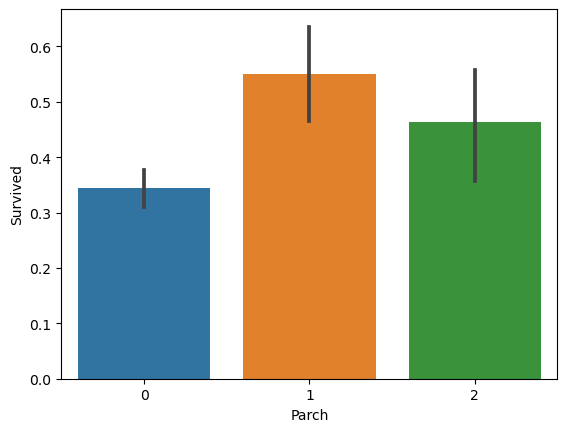

In [58]:
data["Parch"]=np.where(data["Parch"]>=2,2,data["Parch"])

sns.barplot(x=data["Parch"],y=data["Survived"])
data["Parch"].value_counts()



In [59]:
data["SibSp"].value_counts()


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Parch
0    678
1    118
2     95
Name: count, dtype: int64

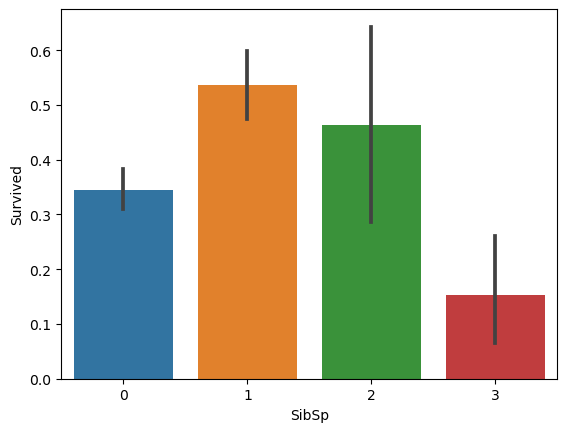

In [60]:
data["SibSp"]=np.where(data["SibSp"]>=3,3,data["SibSp"])
sns.barplot(x=data["SibSp"],y=data["Survived"])
data["Parch"].value_counts()

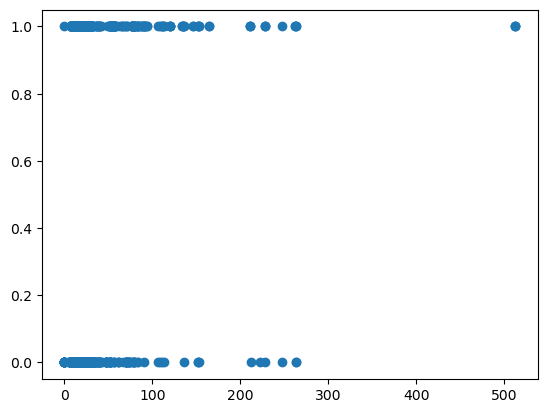

In [61]:
plt.scatter(data["Fare"],data["Survived"])

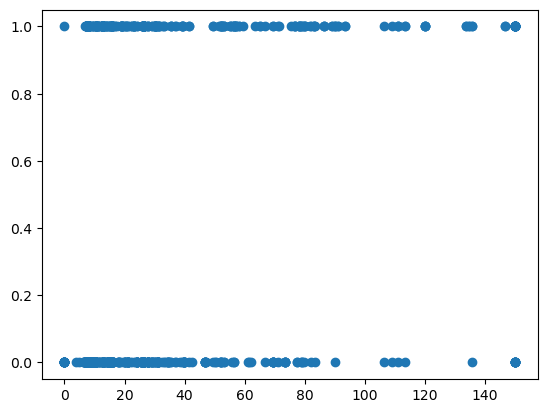

In [62]:
data["Fare"]=np.where(data["Fare"]>150,150,data["Fare"])
plt.scatter(data["Fare"],data["Survived"])

<Axes: xlabel='Survived', ylabel='Age'>

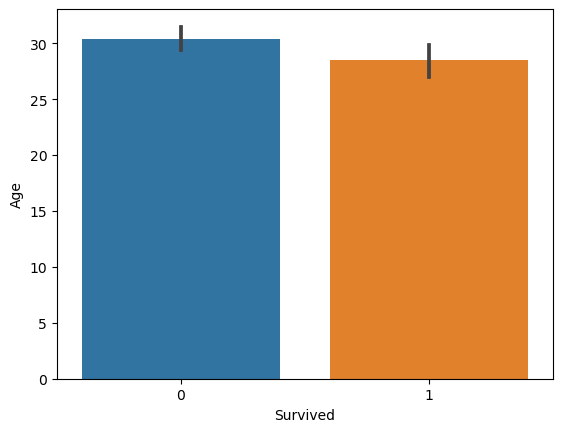

In [63]:
sns.barplot(x=data["Survived"],y=data["Age"])


In [64]:
# X=data.drop(["Survived"],axis=1)
data=pd.get_dummies(data)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


<Axes: >

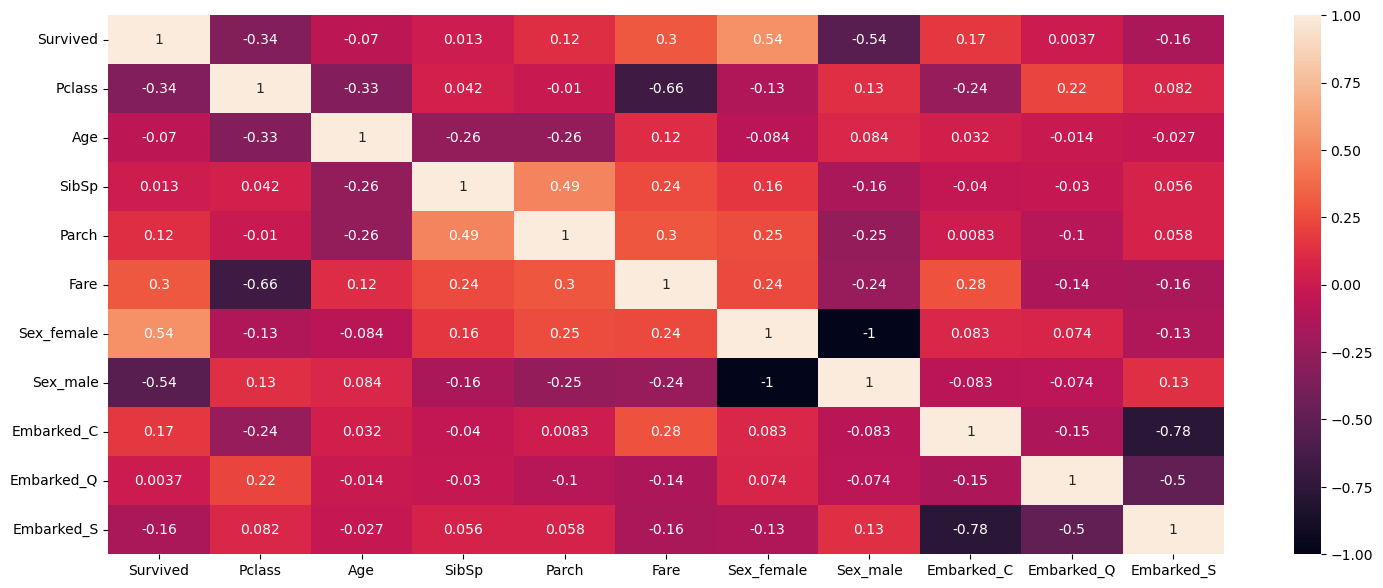

In [65]:
plt.figure(figsize=(18,7))
sns.heatmap(data.corr(),annot=True)

In [66]:
X=data.drop(["Age","SibSp","Survived"],axis=1)
y=data["Survived"]


In [67]:
model=RidgeClassifier()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7851123595505618
0.7932960893854749


In [68]:
model2=SVC(kernel="linear")
model2.fit(X_train,y_train)
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.7851123595505618
0.7932960893854749


In [69]:
X.head()

,Pclass,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,7.2500,False,True,False,False,True
1,1,0,71.2833,True,False,True,False,False
2,3,0,7.9250,True,False,False,False,True
3,1,0,53.1000,True,False,False,False,True
4,3,0,8.0500,False,True,False,False,True


In [70]:
data_test=pd.read_csv("test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
XX=data_test[["Pclass","Parch","Fare","Sex","Embarked"]]
XX=pd.get_dummies(XX)
XX.head()

,Pclass,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,7.8292,False,True,False,True,False
1,3,0,7.0000,True,False,False,False,True
2,2,0,9.6875,False,True,False,True,False
3,3,0,8.6625,False,True,False,False,True
4,3,1,12.2875,True,False,False,False,True


In [76]:
XX.isnull().sum()


Pclass        0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64